In [25]:
import cv2 
import json
import os
import numpy as np
import random

from combine import combine_human
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
## choose your path, can be 0 or 1 or 2 
choose_path = 1

In [33]:
def hconcat_resize(img_list, interpolation = cv2.INTER_CUBIC):
      # take minimum hights
    h_min = min(img.shape[0] for img in img_list)
      
    # image resizing 
    im_list_resize = [cv2.resize(img, (int(img.shape[1] * h_min / img.shape[0]), h_min), interpolation = interpolation) for img in img_list]
      
    # return final image
    return cv2.hconcat(im_list_resize)

path_list = [1448, 2852, 5184]
path_id = path_list[choose_path]
input_path = 'demo_dataset'
humanCombined_output_path = 'demo_dataset/human_added'
final_output_path = 'demo_dataset/combined'  
img_list = []


with open('path.json', 'r') as path_json:
  path_data = json.load(path_json)

with open('direction_info.json', 'r') as direction_json:
  direction_data = json.load(direction_json)

with open('1LXtFkjw3qL_human_info.json', 'r') as human_json:
  human_data = json.load(human_json)

for path in path_data:
  if path['path_id'] == path_id:
    view_list = path['path']
    instruction = path['instructions']

for view_id in view_list:

  view_select = view_id + '_skybox{}_sami'.format(human_data[view_id]['skybox'])
  img_all =[]
  # gen_select = random.randrange(0, 9)
  gen_select = 6
  frame_select = random.randrange(0, 13)
  if human_data[view_id]['skybox'] != 0:
    combine_human(input_path, view_select, humanCombined_output_path, human_data[view_id]['angle'], human_data[view_id]['action'], gen_select, frame_select, human_data[view_id]['x_offset'], human_data[view_id]['y_offset'], human_data[view_id]['scale'], img_list)
    for img_num in range(4):
      if img_num == human_data[view_id]['skybox'] - 1:
        img_all.append(cv2.imread(os.path.join(humanCombined_output_path, '{}_skybox{}_sami.jpg'.format(view_id, human_data[view_id]['skybox']))))
      else:
        img_all.append(cv2.imread(os.path.join(input_path, '{}_skybox{}_sami.jpg'.format(view_id, img_num + 1))))
  else:
    for img_num in range(4):
      img_all.append(cv2.imread(os.path.join(input_path, '{}_skybox{}_sami.jpg'.format(view_id, img_num + 1))))
    
  img_h_resize = hconcat_resize([img_all[0], img_all[1], img_all[2], img_all[3]])
    # show the Output image
  cv2.imwrite(os.path.join(final_output_path, '{}.jpg'.format(view_id)), img_h_resize)


demo_dataset/human_added/9f604c054f8f4a0da5778d3c0b36575d_skybox3_sami.jpg
demo_dataset/human_added/14a8edbbe4b14a05b1b5782a884fb6bf_skybox1_sami.jpg
demo_dataset/human_added/0f1ba9e425a0452eade2a180cfa41e32_skybox1_sami.jpg
demo_dataset/human_added/75bea3b92c924203951655b393e92979_skybox3_sami.jpg
demo_dataset/human_added/425e120b2d7742b1a8f0902355908761_skybox3_sami.jpg


Instructions: 

Exit the bathroom toward the room and pass the black curtain, then pass the green couch and go out the white door on the right and stop at the top of the stairs. 
Walk forward to the yellow sofa thing.  Walk around the yellow sofa thing and enter the door on the left.  Stand at the top of the stairs. 
Walk straight across the room to the other side. Once at the green bed, exit the room out of the door to your right. Once out, stop before you reach the steps. 


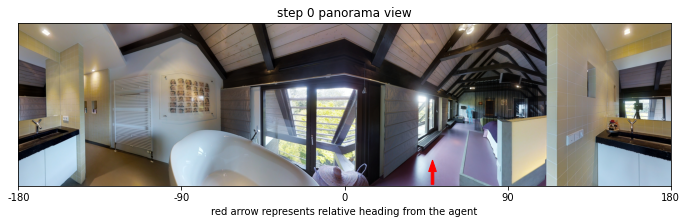

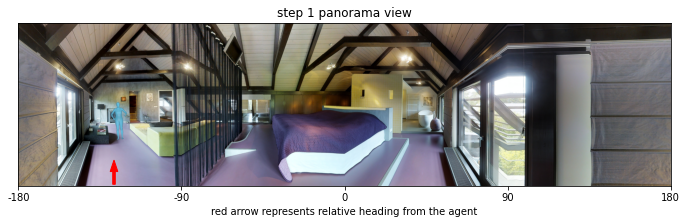

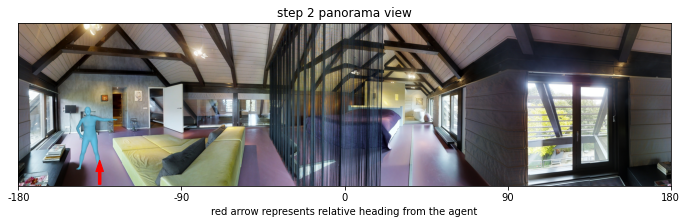

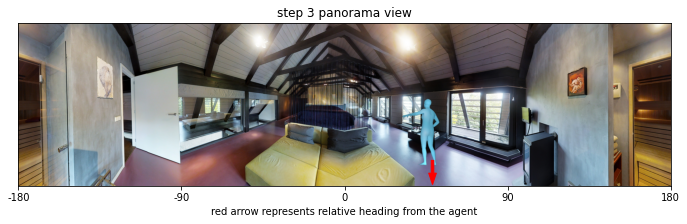

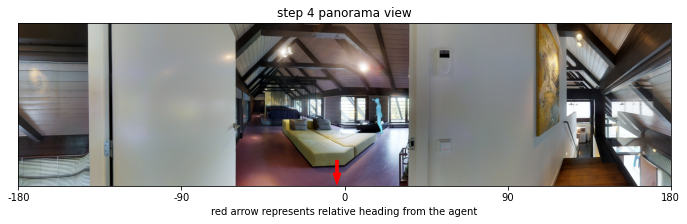

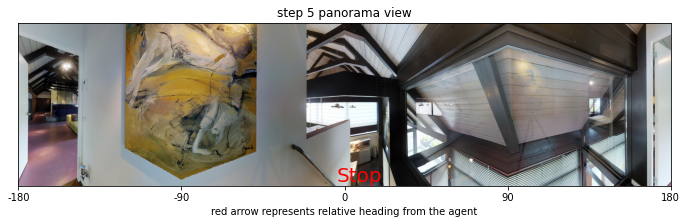

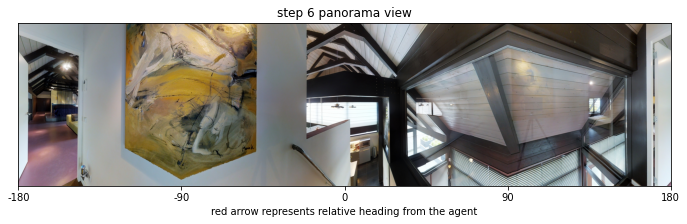

In [34]:
print("Instructions: \n")

for ins_idx in instruction:
    print(ins_idx)
    
for step in range(len(view_list) + 1):
    plt.figure(figsize=(18, 3))
    ## route step
    if step < len(view_list):
        img = cv2.imread(os.path.join(final_output_path, view_list[step] + ".jpg"))
    ## final view
    else:
        img = cv2.imread(os.path.join(final_output_path, view_list[-1] + ".jpg"))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.xticks(np.linspace(0, img_rgb.shape[1] - 1, 5), [-180, -90, 0, 90, 180])
    plt.xlabel('red arrow represents relative heading from the agent')
    plt.yticks([], [])
    plt.title('step %d panorama view' % step)
    ## step with arrow
    if step < len(view_list) - 1:
        plt.arrow(direction_data[str(path_id)][view_list[step]]['x_offset'], direction_data[str(path_id)][view_list[step]]['y_offset'], direction_data[str(path_id)][view_list[step]]['start'], direction_data[str(path_id)][view_list[step]]['stop'], width=16, color='r')
    ## step with stop sign
    elif step == len(view_list) - 1:
        plt.text(direction_data[str(path_id)][view_list[step]]['x_offset'], img_rgb.shape[0] - 30, 'Stop', fontsize=20, color='r')